In [1]:
import sys,os
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
%matplotlib inline
from plotnine import ggplot, aes, facet_grid, labs, geom_point, geom_line, theme, element_blank


## my own libs
extra_path = "/Users/rbansal/Dropbox/ElectionData/lib" # whatever it is
if extra_path not in sys.path:
    sys.path.append(extra_path)

from india_data import *
from indices import *


In [2]:
## lets load some data!!!

election_data = "/Users/rbansal/Dropbox/ElectionData"

kaggle_2019 = election_data + "/" + "kaggle/LS_2.0.csv"
bhavnani_2014 = election_data + "/" + "bhavnani/Bhavnani India national election dataset v 2.csv"
us_presidential = election_data + "/" + "mit_election_lab/US Presidential Election 1976-2020.csv"

ls_df = read_kaggle_and_bhavnani(kaggle_2019, bhavnani_2014)
calc_stats(ls_df)

us_df = read_us_data(us_presidential)


print("\n******Fixing State names****\n")
ls_df = fix_state_names (ls_df)
calc_stats(ls_df)
verify_states(ls_df)

print("\n******Fixing PC names****.....")
ls_df = fix_pc_names (ls_df)

 bhavnani_df: (73081, 13)
 kaggle_2019_df: (2263, 20)
 ls_df: (75344, 9)

PC with 1:60
PC with 2:44
PC with 3:154
PC with 4:15
PC with 5:6
PC with 6:4
PC with 7:5
PC with 8:42
PC with 9:144
PC with 10:35
PC with 11:25
PC with 12:287


PC for LS Year: 1977: 542
PC for LS Year: 1980: 529
PC for LS Year: 1984: 542
PC for LS Year: 1989: 529
PC for LS Year: 1991: 534
PC for LS Year: 1996: 543
PC for LS Year: 1998: 543
PC for LS Year: 1999: 543
PC for LS Year: 2004: 543
PC for LS Year: 2009: 543
PC for LS Year: 2014: 543
PC for LS Year: 2019: 539

******Fixing State names****

PC with 1:32
PC with 2:19
PC with 3:144
PC with 4:27
PC with 5:6
PC with 6:2
PC with 7:5
PC with 8:35
PC with 9:149
PC with 10:17
PC with 11:26
PC with 12:308


PC for LS Year: 1977: 542
PC for LS Year: 1980: 529
PC for LS Year: 1984: 542
PC for LS Year: 1989: 529
PC for LS Year: 1991: 534
PC for LS Year: 1996: 543
PC for LS Year: 1998: 543
PC for LS Year: 1999: 543
PC for LS Year: 2004: 543
PC for LS Year: 2009: 543
P

In [3]:
calc_stats(ls_df)

PC with 1:26
PC with 2:9
PC with 3:119
PC with 4:28
PC with 5:2
PC with 6:0
PC with 7:0
PC with 8:34
PC with 9:123
PC with 10:12
PC with 11:28
PC with 12:343


PC for LS Year: 1977: 542
PC for LS Year: 1980: 529
PC for LS Year: 1984: 542
PC for LS Year: 1989: 529
PC for LS Year: 1991: 534
PC for LS Year: 1996: 543
PC for LS Year: 1998: 543
PC for LS Year: 1999: 543
PC for LS Year: 2004: 543
PC for LS Year: 2009: 543
PC for LS Year: 2014: 543
PC for LS Year: 2019: 539


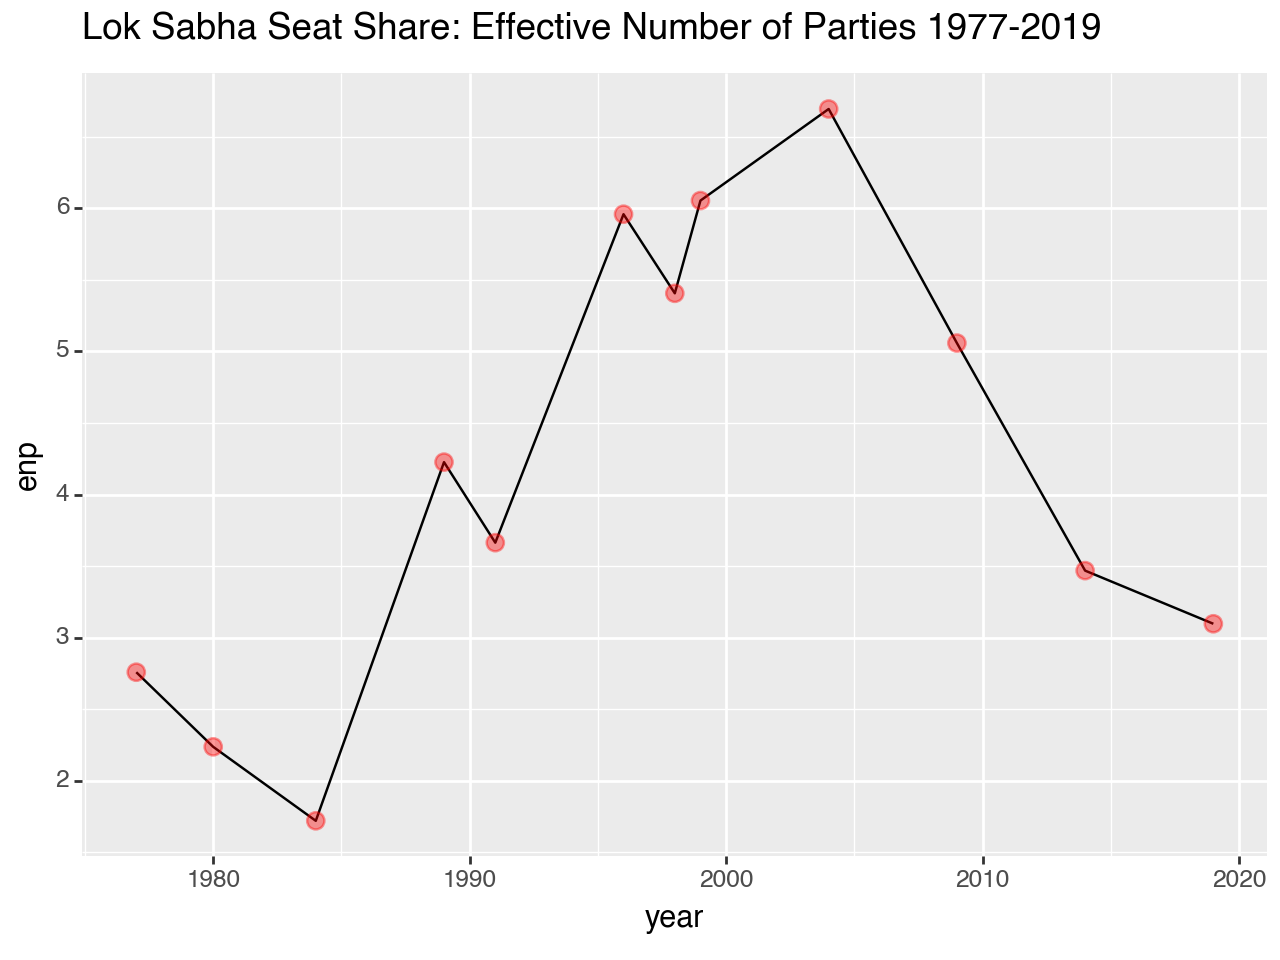

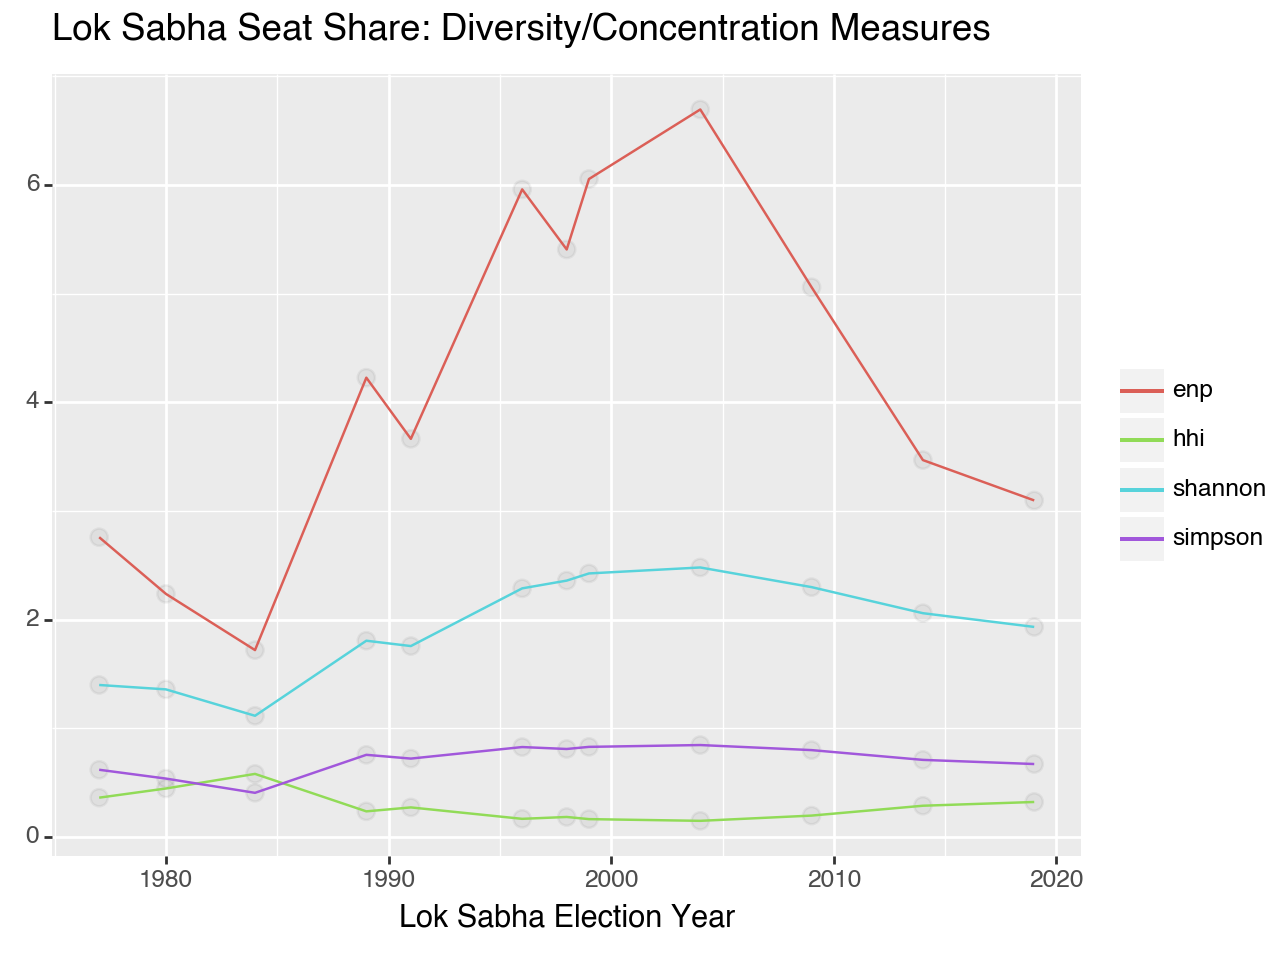

[<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>]


In [27]:
outputs = calc_indices(ls_df)

plots = plot_indices(pd.DataFrame({'year': outputs['measures']['year'],**outputs['measures']['seats']}),
                                          "Lok Sabha Seat Share: Effective Number of Parties 1977-2019",
                     "Lok Sabha Seat Share: Diversity/Concentration Measures"
                     )
print(plots)

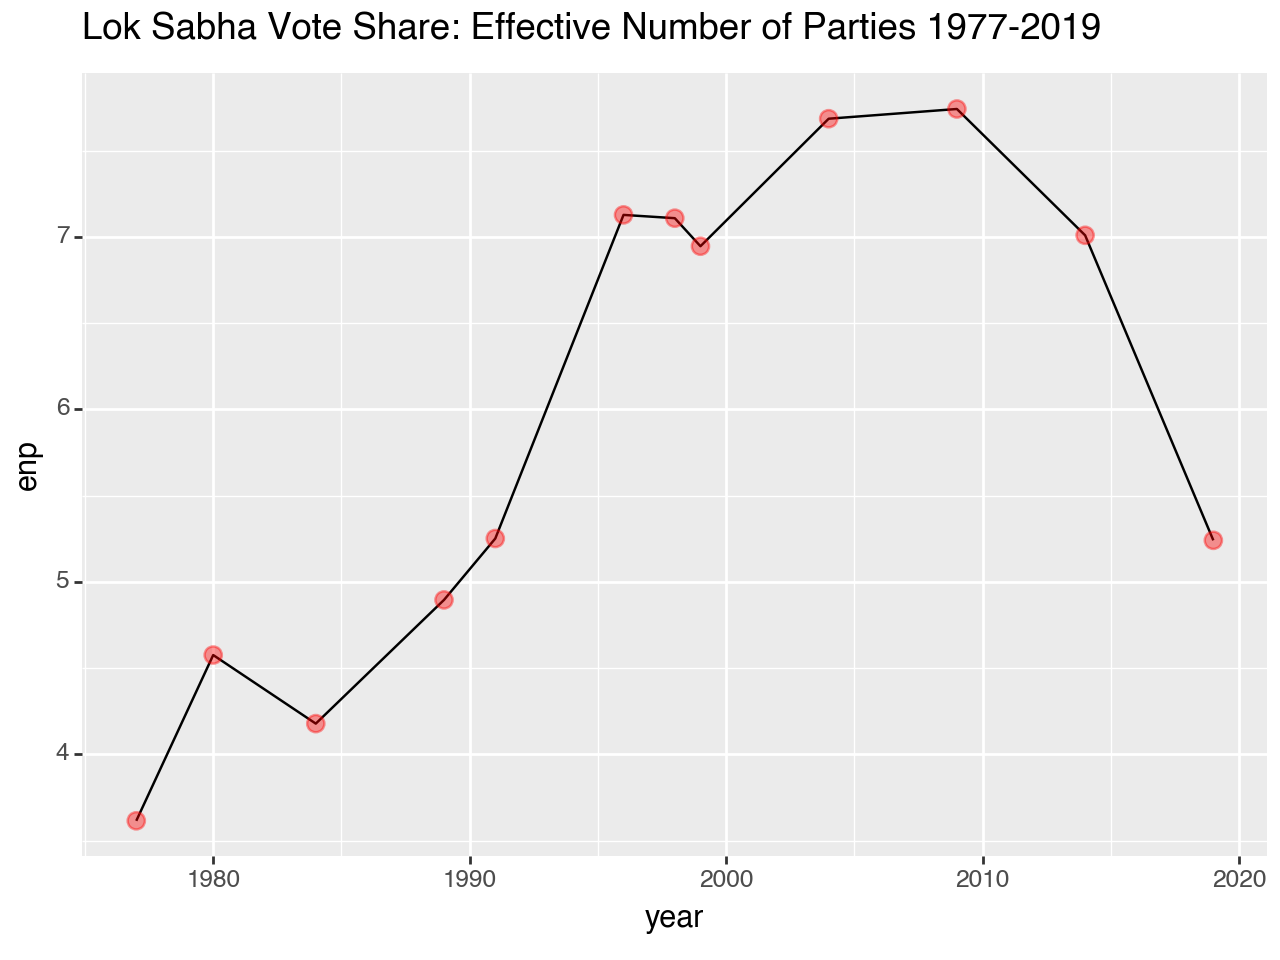

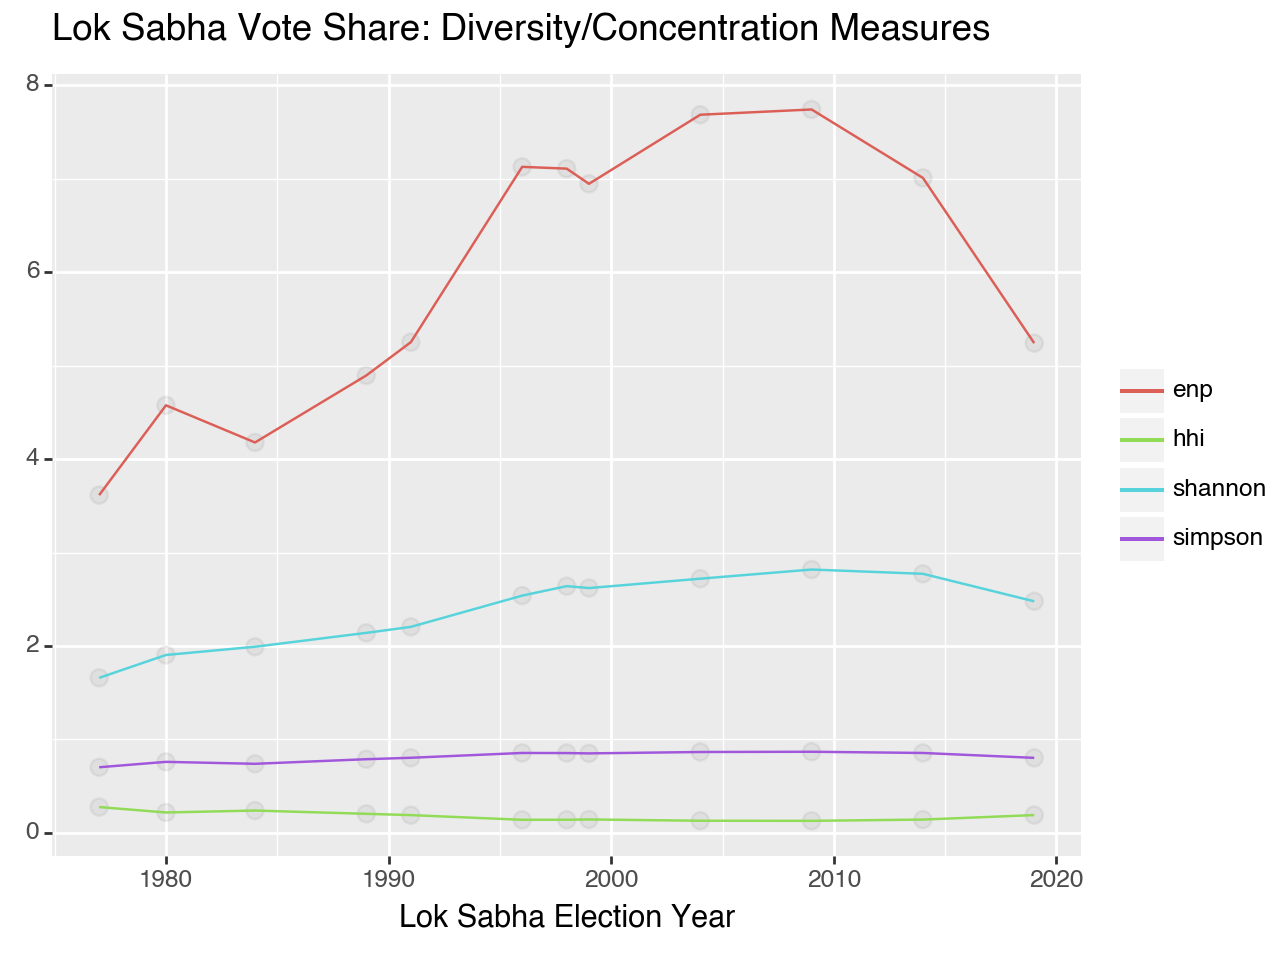

[<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>]


In [28]:
plots = plot_indices(pd.DataFrame({'year': outputs['measures']['year'],**outputs['measures']['total_votes']}),
                     "Lok Sabha Vote Share: Effective Number of Parties 1977-2019",
                     "Lok Sabha Vote Share: Diversity/Concentration Measures"
                  )
print(plots)

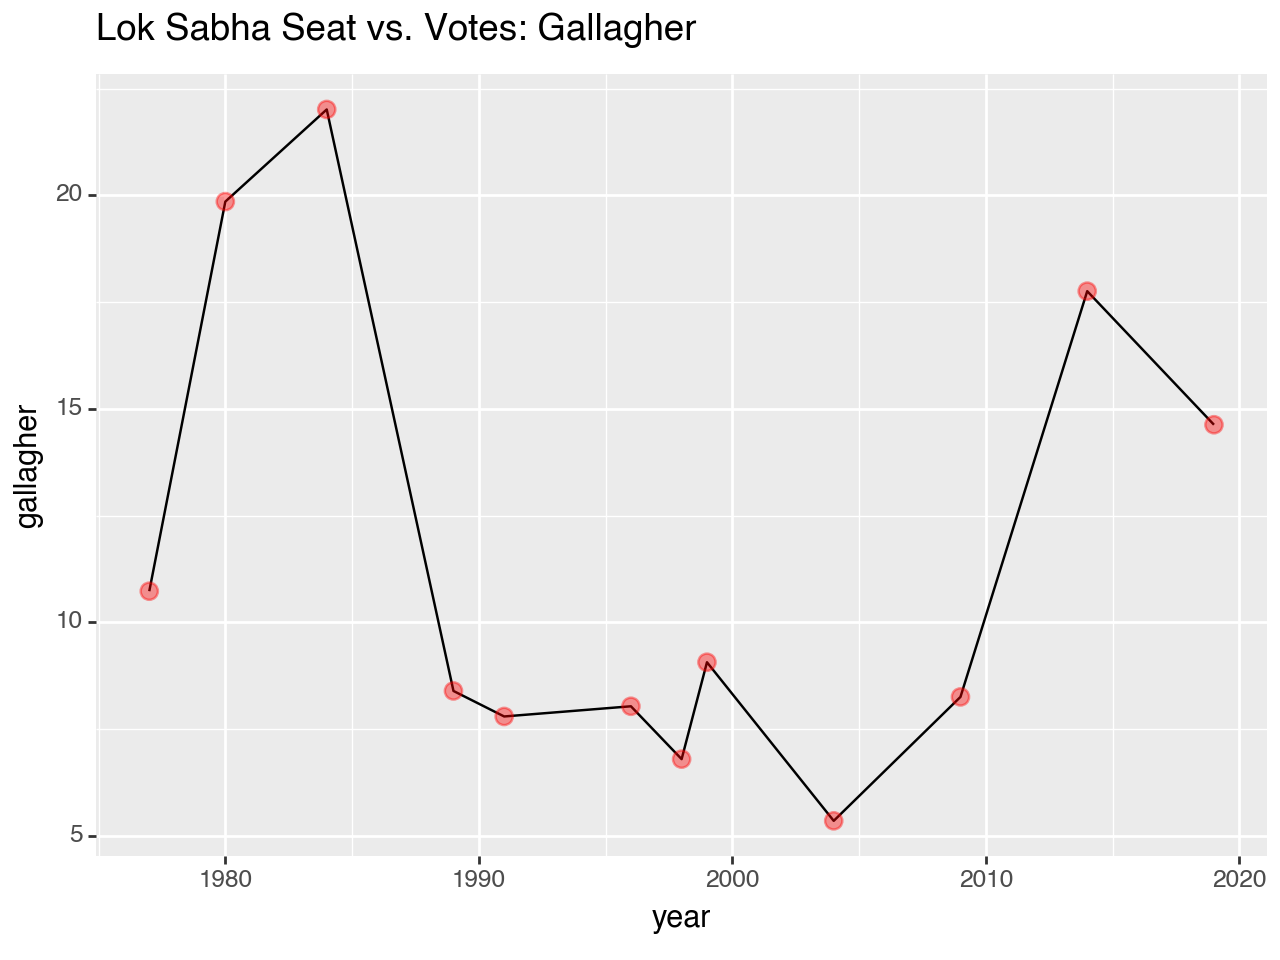

In [30]:
g1 = ggplot(pd.DataFrame({'year': outputs['measures']['year'],'gallagher' : outputs['measures']['gallagher']}), aes(x='year', y='gallagher')) + \
    labs(title="Lok Sabha Seat vs. Votes: Gallagher") + \
    geom_line() + \
    geom_point(colour = "red", size = 3,alpha=0.4)
print(g1)